In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning


In [7]:
# Drop any duplicates
df.drop_duplicates()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


###  Check for nulls

In [8]:
df.notnull().sum().sort_values()
# There are no columns with null values

instant       730
dteday        730
season        730
yr            730
mnth          730
holiday       730
weekday       730
workingday    730
weathersit    730
temp          730
atemp         730
hum           730
windspeed     730
casual        730
registered    730
cnt           730
dtype: int64

In [9]:
def find_cols_with_all_unique():
    cols_unqiue_values = (df.select_dtypes('int').apply(pd.Series.nunique, axis = 0) == len(df.index))
    # Drop coulmns with all unique values
    print(cols_unqiue_values)        

find_cols_with_all_unique()

df.drop(['instant'], axis=1, inplace=True)

instant        True
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
casual        False
registered    False
cnt           False
dtype: bool


### Derived variables

In [10]:
df.dteday =  pd.to_datetime(df.dteday)
df['dteday_year'] = pd.to_datetime(df.dteday).dt.year
# we can drop dteday now as we have months column and year column has been newly introduced
df.drop(['dteday'], axis=1, inplace=True)


### Visualize numeric variables

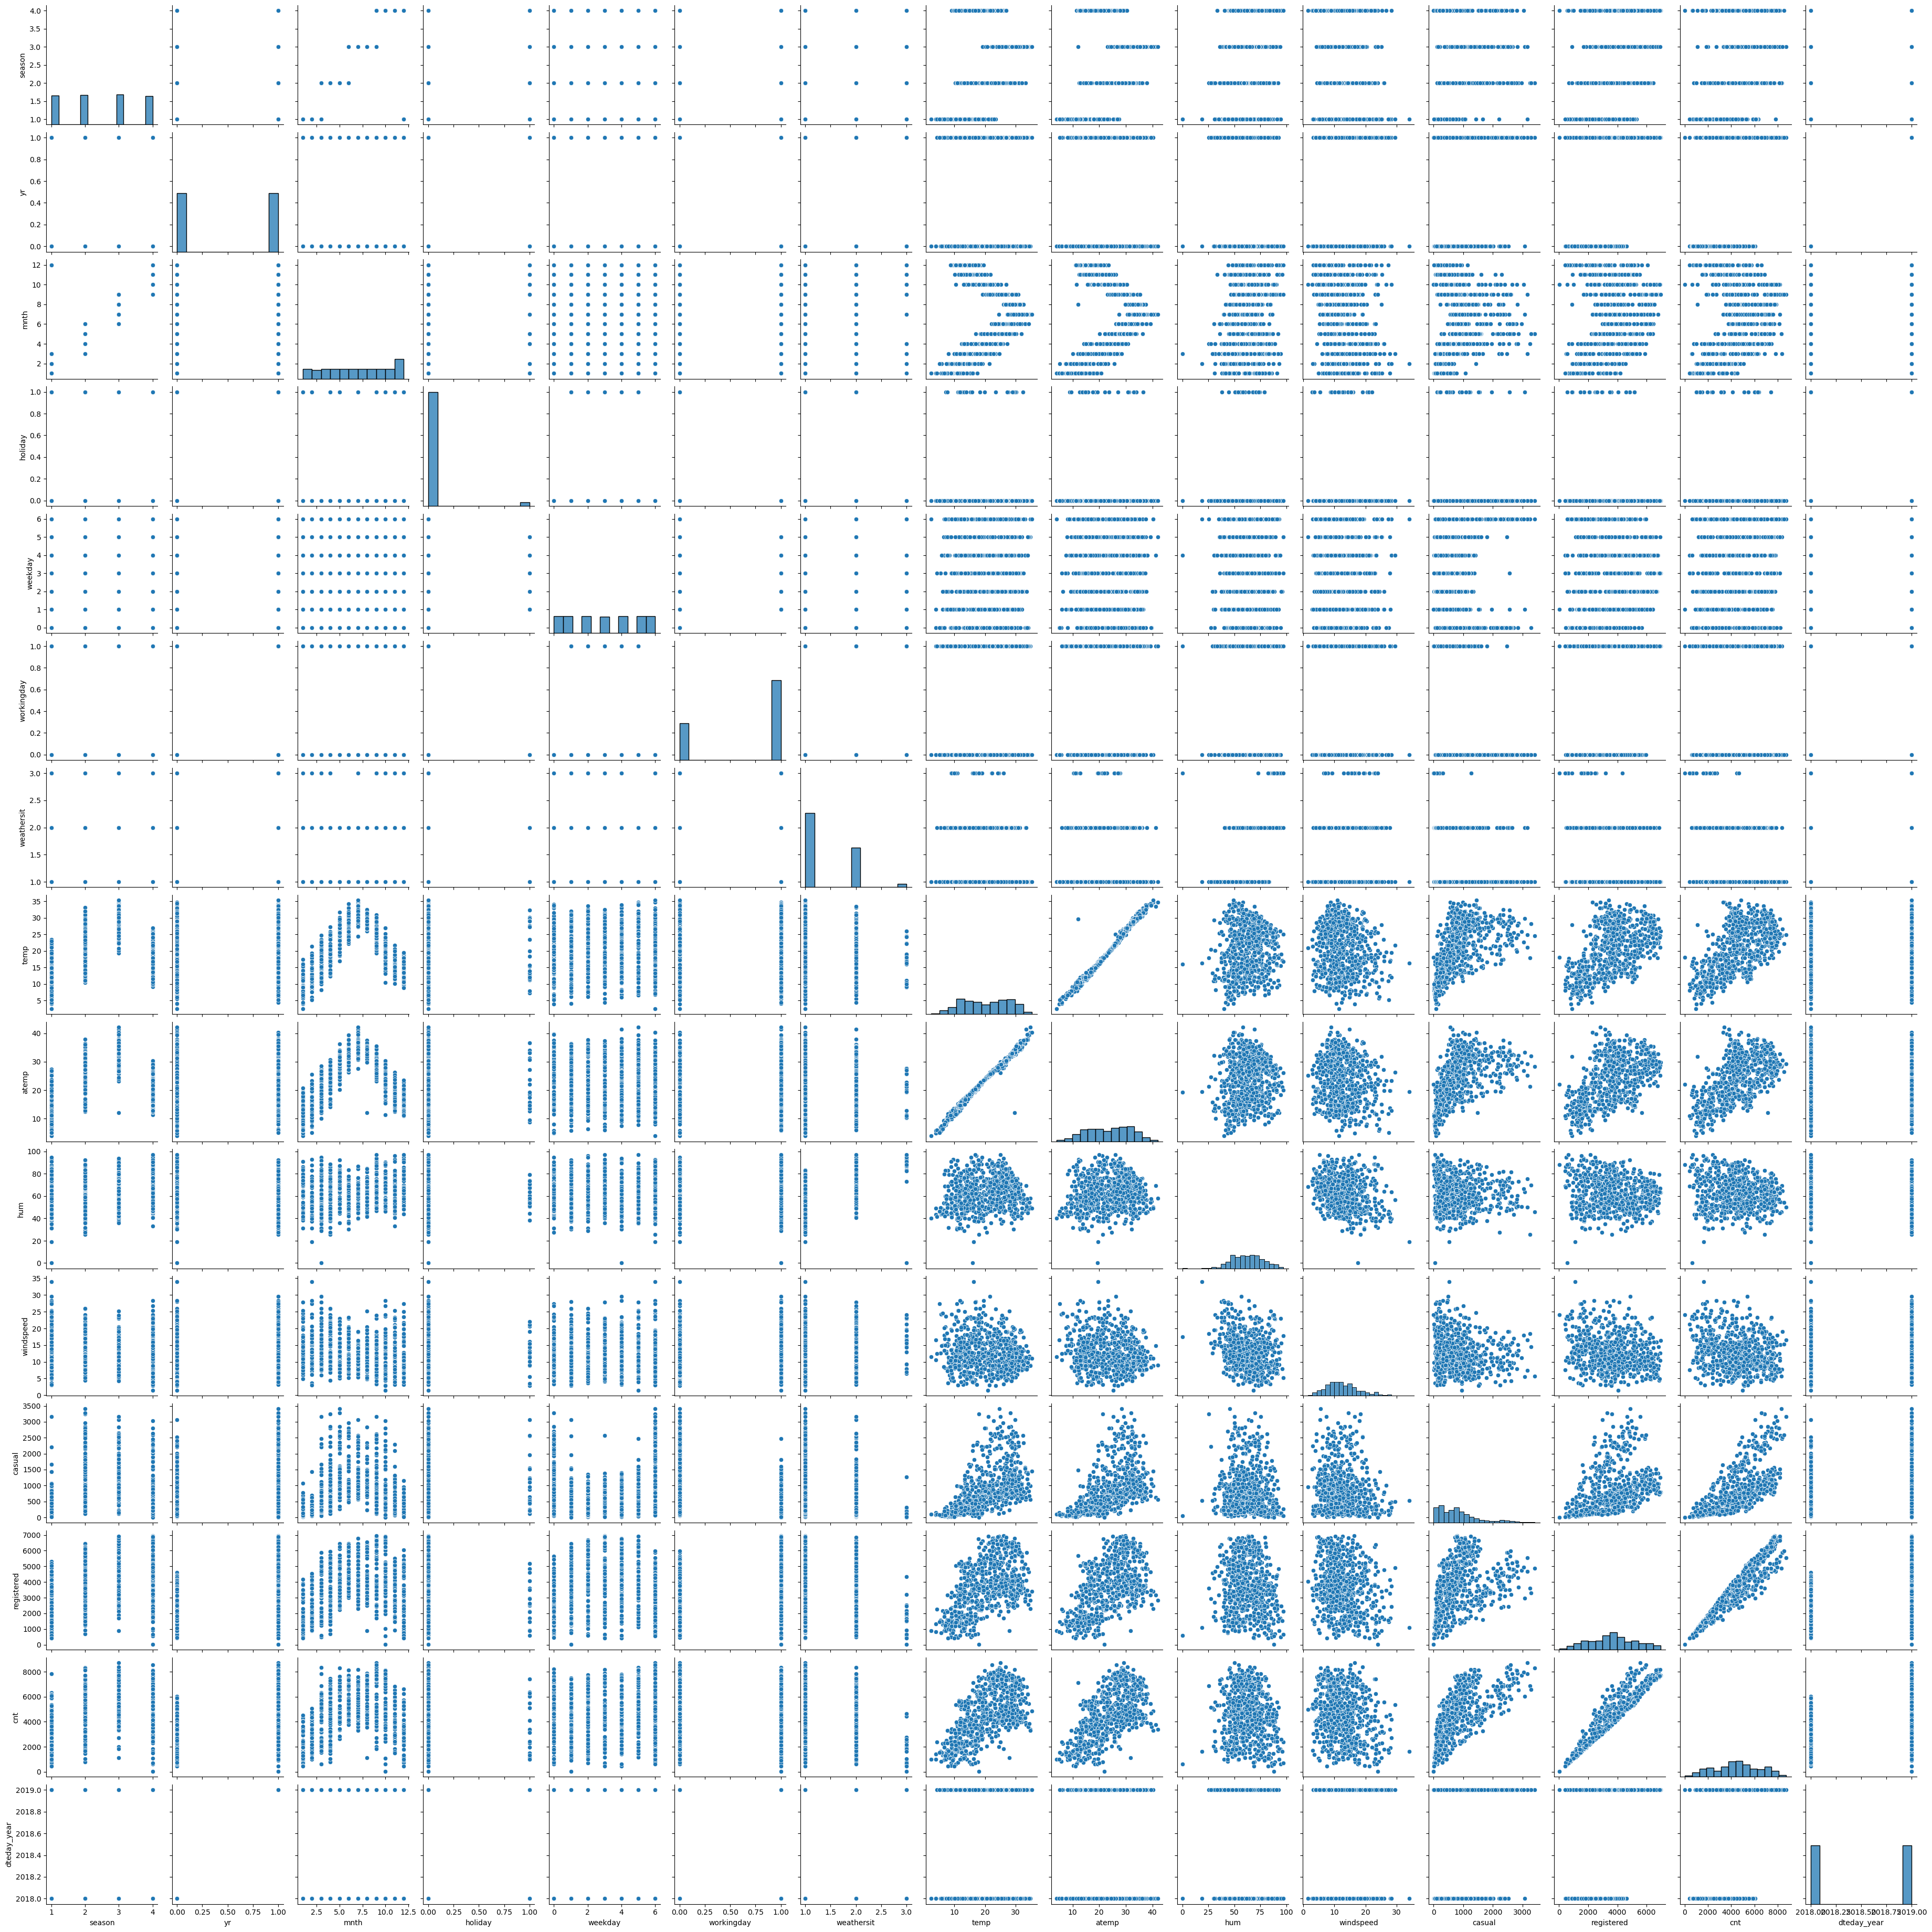

In [11]:
sns.pairplot(df)
plt.show()

**Observations**
1. People seem to take lesser bike rentals in spring season
2. There seems to have been significant rise in total rentals from 2018 to 2019
3. People dont seem to prefer to take rentals on holidays when compared with non-holidays
4. Clear and misty seems to have similar number of total rentals but there is a significant decrease in total rentals if it's a Light snowy day or a day with heavy rains
5. There seems to be some sort of linear relationship between atemp, temp and cnt target variable. 

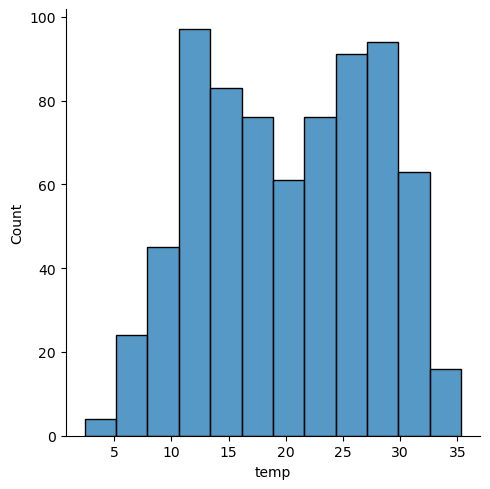

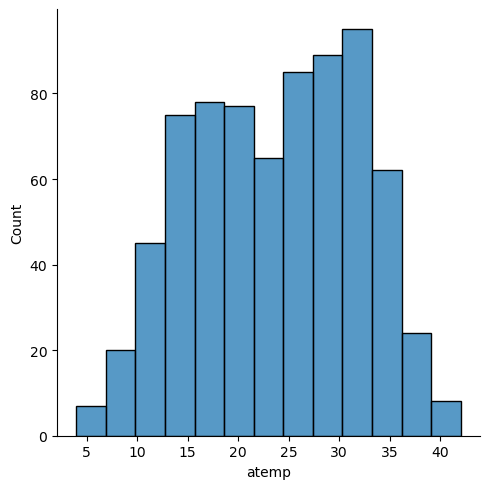

In [12]:
sns.displot(x='temp', data = df)
sns.displot(x="atemp", data=df)

* On most days Temperature seems to lie between 10 and 30 celsius 
* On most days feeling Temperature seems to lie between 15 and 35 celsius 

### Data preparation

In [13]:
# Convert Weather into categorical variable
def conv_weathersit(x):
    return x.map({1: "clear", 2: "misty", 3: "snowy", 4: "rainy"})

df[['weathersit']] = df[['weathersit']].apply(conv_weathersit)

In [14]:
# Convert season into categorical variable
def conv_season(x):
    return x.map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

df[['season']] = df[['season']].apply(conv_season)

In [15]:
# Convert months into categorical variable
def conv_mnth(x):
    return x.map({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"})

df[['mnth']] = df[['mnth']].apply(conv_mnth)

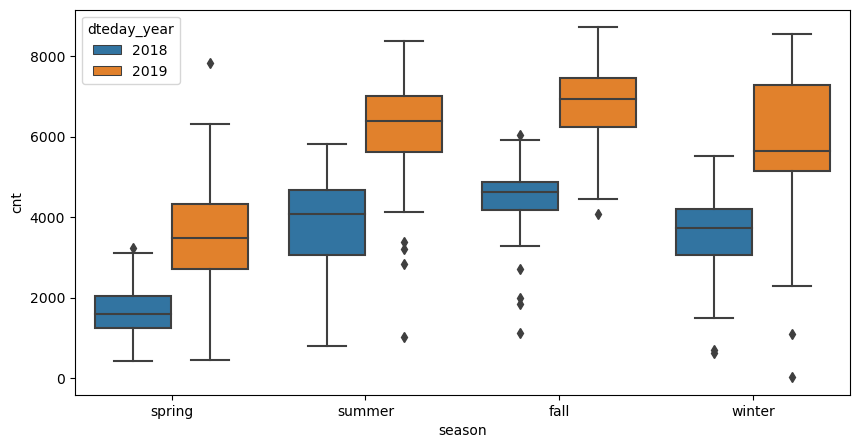

In [16]:
### Plot Categorical variables
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'dteday_year', data = df)
plt.show()

* Except Spring, Summer, fall and winter seems to experience similar number of total bike riders
* There has been an increase in total bike riders from 2018 to 2019 across all seasons

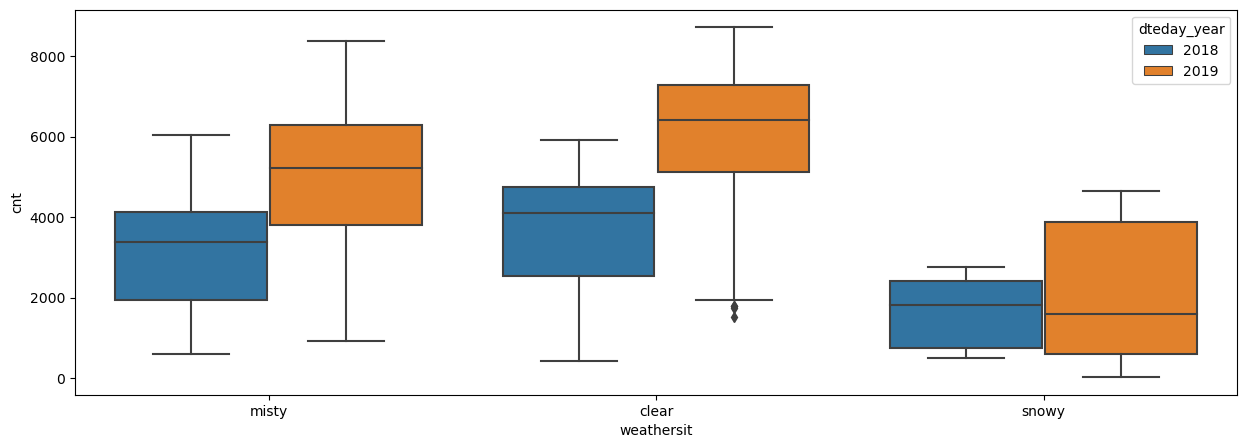

In [17]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'dteday_year', data = df)
plt.show()

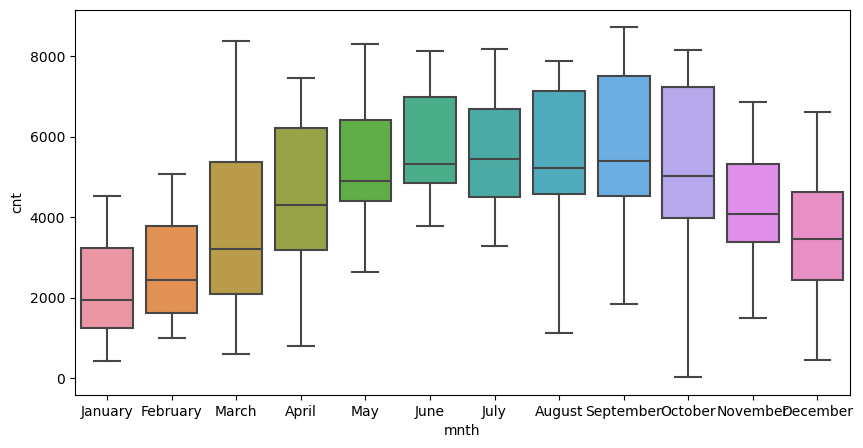

In [18]:
### Plot Categorical variables
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.show()

* Months like May, June, July, August, September, October exprience relatively similar and higher number of bike rentals than other months
* There is a **sudden peak in the 50% percentile of bike rentals from March to April**  and a **sudden drop in the 50% percentile of bike rentals from March to April** 

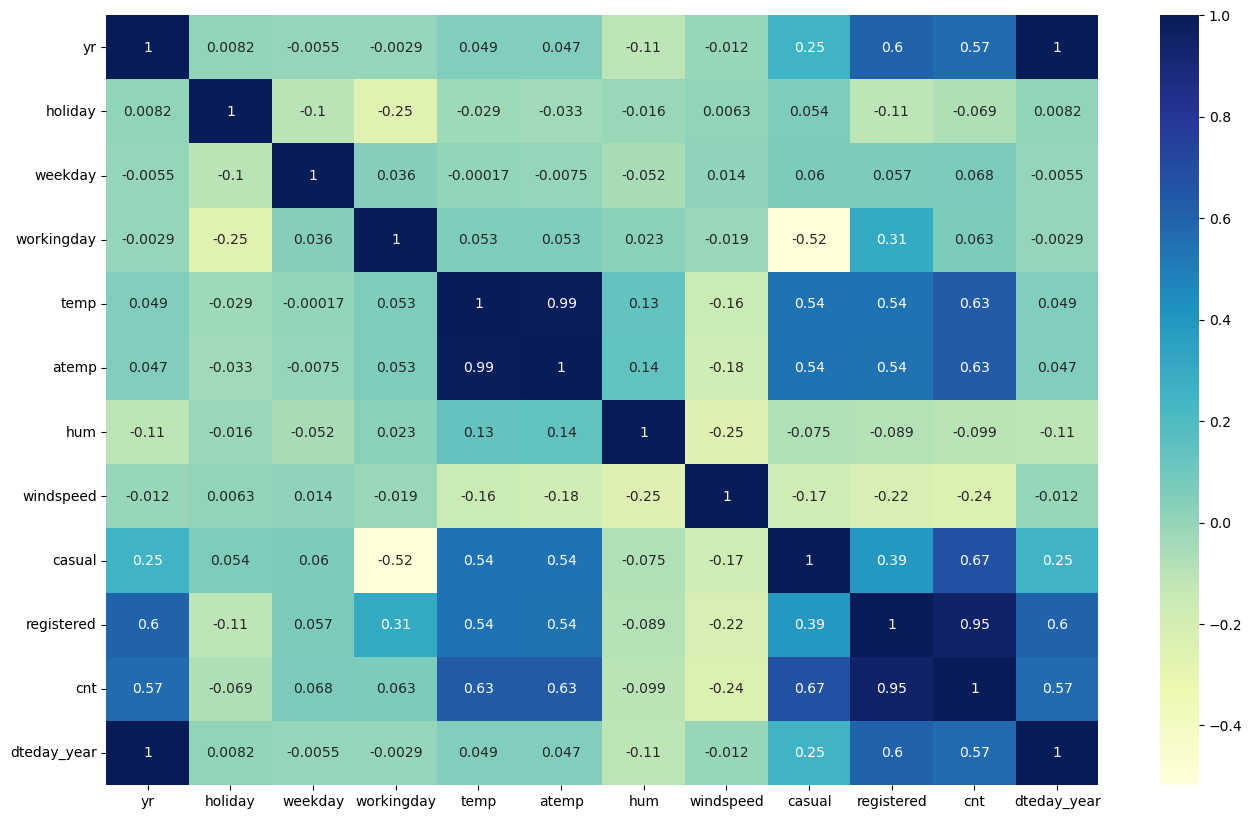

In [21]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

* cnt seems to highest correlation with temp and atemp
* As the target variable is cnt and there cnt is a combination of registered and casual they would be not useful in model building 
* There is high inter-correlation between atemp and temp, so we can drop one of those columns

In [22]:
df.drop(['registered', 'casual', 'atemp'], axis=1, inplace=True)

### Create Dummy variables

In [19]:
holiday = pd.get_dummies(df['holiday'], drop_first=True)
holiday

,1
0,0
1,0
2,0
3,0
4,0
...,...
725,0
726,0
727,0
728,0


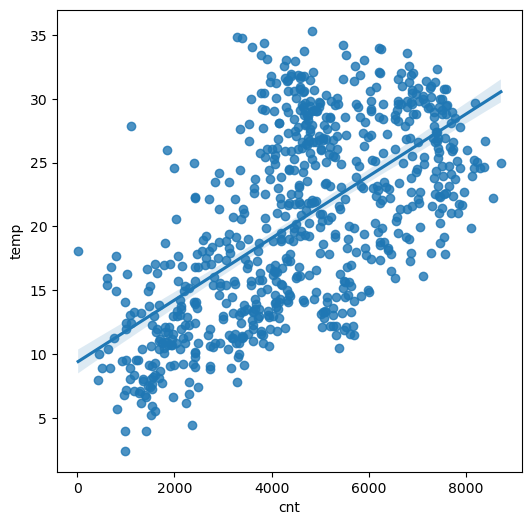

In [24]:
# As there is high correlation between temp and cnt variable, 
# Picking temp as the first variable and we'll try to fit a regression to that
plt.figure(figsize=[6,6])
sns.regplot(x = df.cnt, y=df.temp, data=df)
plt.show()

### Building a linear model

#### Dividing into X and Y sets for the model building

In [28]:
y_train = df.pop('cnt')
X_train = df

In [29]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a frst fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [30]:
lr.params

const    1222.040264
temp      161.716850
dtype: float64